In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка датасета и первичный осмотр

In [4]:
net = 'https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv'
df = pd.read_csv(net)

In [6]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [8]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


# Пропуски, дубликаты и базовый контроль качества

In [10]:
df.isna().mean() # считаем среднее значение пропусков в каждой колонке

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [12]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [14]:
df[df.duplicated()] # видим, что есть один дупликат

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [18]:
df[df['age'] < 0] # ненулевого возраста не существует

,user_id,age,country,purchases,revenue


In [19]:
df[df['purchases'] < 0] 

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [20]:
df[df['revenue'] == 0]

,user_id,age,country,purchases,revenue
6,7,46.0,RU,0,0
10,11,24.0,US,4,0
17,18,24.0,RU,0,0
33,34,28.0,FR,0,0


In [25]:
df[(df['age'] < 18) | (df['age'] > 100)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


## Вывод: 


Выявлена первая аномалия, проверка на условия покупок выявело, что возвраст покупатела не совсем реалистичен 120 лет, плюс колонка purchases не может быть отрицательна.
Встретилась вторая аномилая, при совершенных покупках revenue не может быть равна 0
В целом можно увидеть и третью аномалию, в которой ребенок совершает покупки на уровне взрослых людей. Что не очень закономерно, учитывая возраст

# Базовый EDA: группировки, агрегаты и частоты

## Частоты по категориальной переменной

In [26]:
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

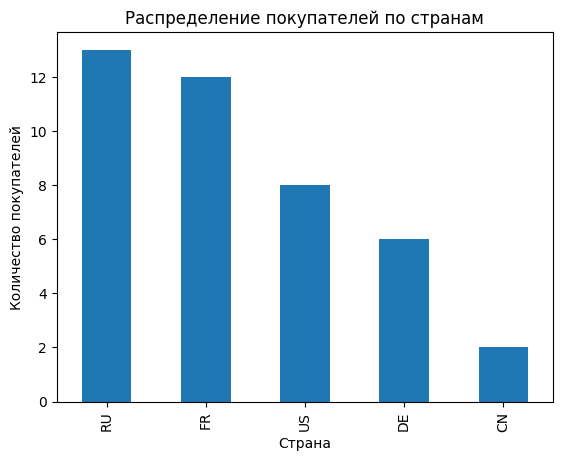

In [29]:
df["country"].value_counts().plot(kind="bar")
plt.xlabel("Страна")
plt.ylabel("Количество покупателей")
plt.title("Распределение покупателей по странам")
plt.show()


In [31]:
country_stats = (
    df.groupby("country")
      .agg(
          customers=("user_id", "nunique"),
          mean_age=("age", "mean"),
          mean_purchases=("purchases", "mean"),
          sum_purchases=("purchases", "sum"),
          mean_revenue=("revenue", "mean"),
          sum_revenue=("revenue", "sum")
      )
)

country_stats


,customers,mean_age,mean_purchases,sum_purchases,mean_revenue,sum_revenue
country,,,,,,
CN,2,24.000000,4.500000,9,1054.000000,2108
DE,6,34.600000,6.500000,39,1445.500000,8673
FR,12,46.250000,4.250000,51,675.916667,8111
RU,12,30.076923,4.769231,62,790.076923,10271
US,8,36.714286,4.625000,37,557.375000,4459


## Вывод

Анализ частот показал, что в выборке доминируют пользователи из России и Франции; также представлены клиенты из США, Германии и Китая, причём доля китайских пользователей минимальна. По агрегированным показателям видно, что наибольший суммарный объём покупок и выручки вносят российские пользователи, что связано как с их численностью, так и с относительно высоким количеством покупок.

При этом по средним значениям выручки и числу покупок на клиента заметно выделяются пользователи из Германии, тогда как для стран с небольшой численностью (например, Китай) средние показатели менее надёжны из-за малой выборки.

# Визуализация данных в Matplotlib

## Гистограмма для количественного признака age

In [38]:
fig_dir = "figures"

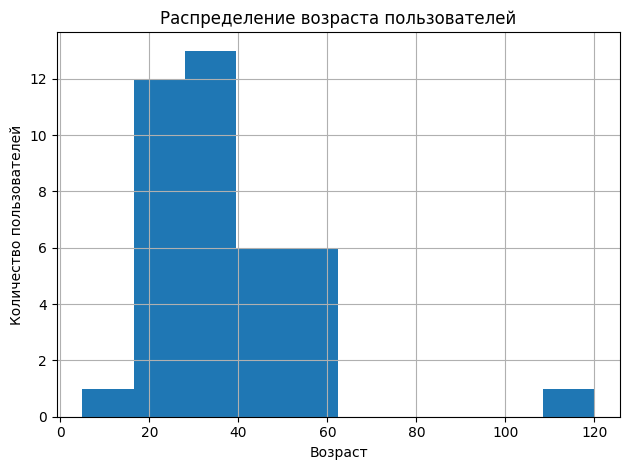

In [43]:
ages = df['age'].dropna() # удалим NA значения

df.hist('age', bins=10)

plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение возраста пользователей')

plt.tight_layout()
plt.savefig(f"{fig_dir}/age_histogram.png", dpi=150)
plt.show()

На гистограмме показано распределение возраста пользователей. Видно, что основная часть наблюдений сосредоточена в интервале примерно от 18 до 40 лет. Отдельно выделяются аномальные значения (например, очень малый возраст и возраст свыше 100 лет), что соответствует ранее выявленным проблемам качества данных.

## Боксплот (boxplot) для количественного признака

<Figure size 700x400 with 0 Axes>

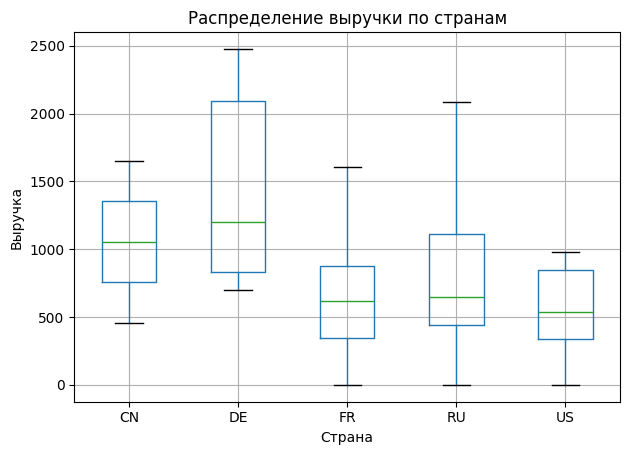

In [46]:
plt.figure(figsize=(7, 4))

df.boxplot(column="revenue", by="country")

plt.xlabel("Страна")
plt.ylabel("Выручка")
plt.title("Распределение выручки по странам")
plt.suptitle("")  # убираем автоматический заголовок "Boxplot grouped by country"

plt.tight_layout()
plt.savefig(f"{fig_dir}/revenue_boxplot_by_country.png", dpi=150)
plt.show()

Германия (DE) выделяется самой высокой медианной выручкой и широким разбросом значений. Франция (FR), США (US) и Россия (RU) показывают умеренный и схожий уровень выручки, хотя в России встречаются нулевые значения. Китай (CN) выглядит высокодоходным, но малая выборка делает выводы ненадёжными.

## Scatter plot (диаграмма рассеяния) purchases vs revenue

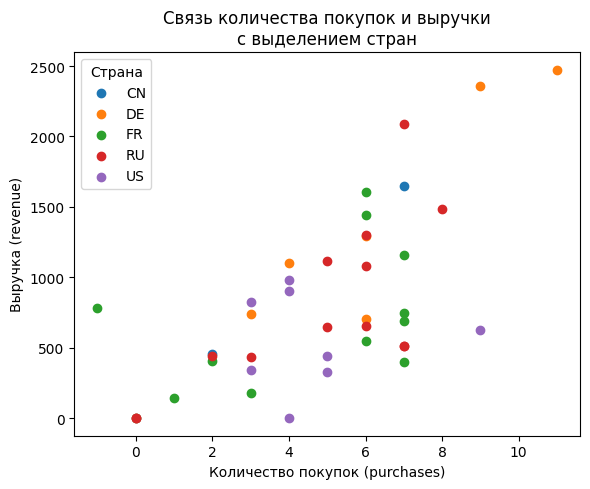

In [48]:
plt.figure(figsize=(6, 5))

for country, subdf in df.groupby("country"):
    plt.scatter(
        subdf["purchases"],
        subdf["revenue"],
        label=country,
    )

plt.xlabel("Количество покупок (purchases)")
plt.ylabel("Выручка (revenue)")
plt.title("Связь количества покупок и выручки\nс выделением стран")
plt.legend(title="Страна")

plt.tight_layout()
plt.savefig(f"{fig_dir}/purchases_vs_revenue_scatter.png", dpi=150)
plt.show()


Диаграмма рассеяния показывает связь между количеством покупок и суммарной выручкой по пользователям. В целом прослеживается ожидаемая тенденция: при увеличении числа покупок выручка растёт. При этом точки разных цветов обозначают страны, что позволяет увидеть, что в некоторых странах пользователи при сопоставимом числе покупок приносят большую или меньшую выручку.